<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_09/03_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%capture
!pip install category-encoders

In [55]:
import pandas as pd

# Import what you feel is neccessary from scikit-learn
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


<center><H1>Adult Dataset Classification</H1></center>


<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/HoffxyN8ghVuw/giphy.gif">
</p>

### Target = "<=50k"

### [Data Dictionary/Details](https://archive.ics.uci.edu/ml/datasets/Adult)

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- "<=50k" = >50K, <=50K (TARGET)

<center><H3>-----RULES-----</H3></center>

<p align="center">
  <img width="700" height="350" src="https://media.giphy.com/media/iB4PoTVka0Xnul7UaC/giphy.gif">
</p>

### Your data has already been split into training and testing sets, do not use `train_test_split`
### Only use your training set for EDA, Cleaning, Modeling, etc.
- **You will have to perform the same transformations on your test set that you apply to your training set. The column names are exactly the same as your training set.**

### **DO NOT** look into your test set until you are ready to test the accuracy of your model. Your test set is supposed to represent unseen data and lets treat it that way until we are ready to test our accuracy. Your transformations on your training set should work on your test set since it has the exact same column names and the values are exactly the same.



In [2]:
# Starter Code --DO NOT ADJUST--
col_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "ooccupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]
training = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=col_names).drop("race", axis=1)
test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names=col_names, skiprows=1).drop("race", axis=1)

training["target"] = training["target"].apply(lambda x: x.strip())
test["target"] = test["target"].apply(lambda x: x.strip()[:-1])

# Create Train
X_train = training.drop("target", axis=1)
y_train = training["target"]

# Create Test
X_test = test.drop("target", axis=1)
y_test = test["target"]

### **Determine your baseline model accuracy**

In [9]:
# Mean baseline is <=50k with a 75.9% accuracy
training["target"].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

### **Visualize the data in your training set (EDA)**
- Please only create 3 visualization explaining different insights in the data. So you have enough time to model. 
- You can only use one of each plot type, this means you cant make 3 bar plot, 3 Scatter Plots, etc.


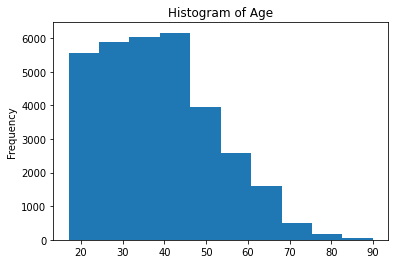

In [26]:
training["age"].plot(kind="hist", title="Histogram of Age");

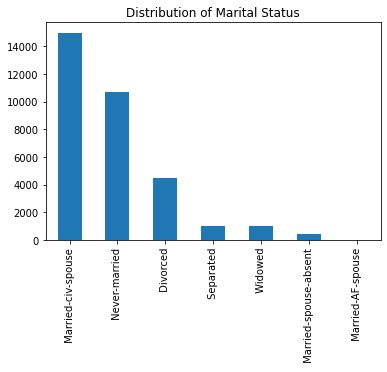

In [27]:
training["marital_status"].value_counts().plot(kind="bar", title="Distribution of Marital Status");

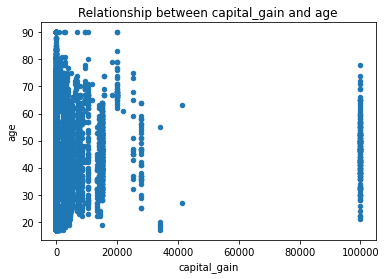

In [28]:
training.plot(kind="scatter", y="age", x="capital_gain", title="Relationship between capital_gain and age");

### **Clean and Preprocess your Data** (Hint: One-Hot-Encode Categoricals)
Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### **Create a kNN model** 



In [58]:
pipe = make_pipeline(
    ce.OneHotEncoder(),
    StandardScaler(),
    KNeighborsClassifier(n_jobs=-1)
)

p_grid = {
    "onehotencoder__drop_invariant": [True, False],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "kneighborsclassifier__n_neighbors": [11,13,16],
    "kneighborsclassifier__weights": ["uniform", "distance"],
    "kneighborsclassifier__algorithm": ["auto", "ball_tree", "kd_tree"],
    "kneighborsclassifier__metric": ["minkowski", "euclidean"]
}
grid = GridSearchCV(pipe, param_grid=p_grid, cv=10, scoring="roc_auc", n_jobs=4, verbose=2)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 12.2min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 21.5min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 35.7min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 58.1min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 83.1min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 103.6min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 113.9min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.9)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=4,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree'],
                         'kneighborsclassifier__metric': ['minkowski',
                                                          'euclidean'],
                         'kneighborsclassifier__n_neighbors': [11, 13, 16],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance'],
                 

In [59]:
# Best Params
grid.best_params_

{'kneighborsclassifier__algorithm': 'ball_tree',
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__n_neighbors': 16,
 'kneighborsclassifier__weights': 'uniform',
 'onehotencoder__drop_invariant': False,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

In [60]:
# Score

accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.8325041459369817

### **Show us your confusion matrix and explain the results**

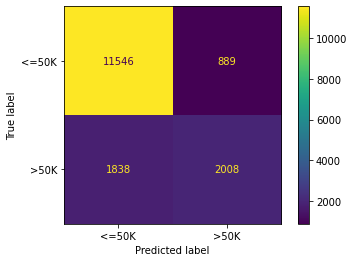

In [61]:
plot_confusion_matrix(grid, X_test, y_test)

In [62]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     12435
        >50K       0.69      0.52      0.60      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.74     16281
weighted avg       0.82      0.83      0.82     16281



your stuff here

### **Compare to Baseline model and explain the results**

your stuff here

### **BONUS ☝️**
- Create a Logistic Regression Model
- Compare results to kNN and Baseline and explain the results



In [44]:
pipe2 = make_pipeline(
    ce.OneHotEncoder(),
    StandardScaler(),
    LogisticRegression()
)

p_grid2 = {
    "onehotencoder__drop_invariant": [True, False],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],

}
grid2 = GridSearchCV(pipe2, param_grid=p_grid2, cv=10, scoring="roc_auc", n_jobs=-1, verbose=2)
grid2.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   44.9s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'onehotencoder__drop_invariant': [True, False],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='roc_auc', verbose=2)

In [45]:
accuracy_score(y_test, grid2.best_estimator_.predict(X_test))

0.8525274860266568

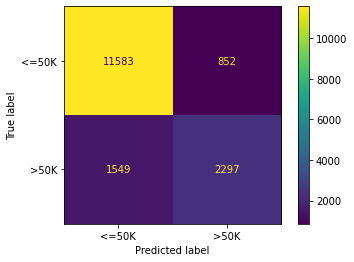

In [46]:
plot_confusion_matrix(grid2, X_test, y_test)

In [47]:
print(classification_report(y_test, grid2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91     12435
        >50K       0.73      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



your stuff here

### **BONUS ✌️**
- Use GridSearchCV with your Logistic Regression with `cv=10` passed into your grid